In [1]:
import trompy as tp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename="C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\Linnea\\ARP5\\ARP3 and ARP5 conditioning and preference metafile.xlsx"
datafolder="C:\\Data\\ARP3 and ARP5\\"
rows, header=tp.metafilereader(filename)

File is excel file. Making csv metafile first


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\Linnea\\ARP5\\ARP3 and ARP5 conditioning and preference metafile.xlsx'

In [65]:
NR = []
PR = []

for row in rows:
        if row[3] == "NR":
            if row[1] not in NR:
                NR.append(row[1])
        else:
            if row[1] not in PR:
                PR.append(row[1])


In [66]:
NR_male = []
NR_female = []

PR_male = []
PR_female = []


for row in rows:
        if row[3] == "NR" and row[4]=="male":
            if row[1] not in NR_male:
                NR_male.append(row[1])


for row in rows:
        if row[3] == "PR" and row[4]=="male":
            if row[1] not in PR_male:
                PR_male.append(row[1])

for row in rows:
        if row[3] == "NR" and row[4]=="female":
            if row[1] not in NR_female:
                NR_female.append(row[1])
                
for row in rows:
        if row[3] == "PR" and row[4]=="female":
            if row[1] not in PR_female:
                PR_female.append(row[1])


In [67]:
len(NR_male)

14

In [68]:
NR_M_Malt_Licks = []
NR_F_Malt_Licks = []

NR_M_Cas_Licks = []
NR_F_Cas_Licks = []

PR_M_Malt_Licks = []
PR_F_Malt_Licks = []

PR_M_Cas_Licks = []
PR_F_Cas_Licks = []


for mouse in NR_male:
    temp = []
    for row in rows:
        if row[1] == mouse:
            if row [5] == "malt":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["b", "c"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
            elif row [6] == "malt":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["e", "f"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
                
    NR_M_Malt_Licks.append(np.mean(temp))
    
for mouse in NR_male:
    temp = []
    for row in rows:
        if row[1] == mouse:
            if row [5] == "casein":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["b", "c"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
            elif row [6] == "casein":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["e", "f"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
                
    NR_M_Cas_Licks.append(np.mean(temp))
    
for mouse in NR_female:
    temp = []
    for row in rows:
        if row[1] == mouse:
            if row [5] == "malt":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["b", "c"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
            elif row [6] == "malt":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["e", "f"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
                
    NR_F_Malt_Licks.append(np.mean(temp))
    
for mouse in NR_female:
    temp = []
    for row in rows:
        if row[1] == mouse:
            if row [5] == "casein":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["b", "c"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
            elif row [6] == "casein":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["e", "f"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
                
    NR_F_Cas_Licks.append(np.mean(temp))


for mouse in PR_male:
    temp = []
    for row in rows:
        if row[1] == mouse:
            if row [5] == "malt":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["b", "c"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
            elif row [6] == "malt":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["e", "f"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
                
    PR_M_Malt_Licks.append(np.mean(temp))
    
for mouse in PR_male:
    temp = []
    for row in rows:
        if row[1] == mouse:
            if row [5] == "casein":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["b", "c"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
            elif row [6] == "casein":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["e", "f"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
                
    PR_M_Cas_Licks.append(np.mean(temp))

for mouse in PR_female:
    temp = []
    for row in rows:
        if row[1] == mouse:
            if row [5] == "malt":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["b", "c"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
            elif row [6] == "malt":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["e", "f"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
                
    PR_F_Malt_Licks.append(np.mean(temp))
    
for mouse in PR_female:
    temp = []
    for row in rows:
        if row[1] == mouse:
            if row [5] == "casein":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["b", "c"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
            elif row [6] == "casein":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["e", "f"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
                
    PR_F_Cas_Licks.append(np.mean(temp))

    
print(NR_M_Malt_Licks) 
print(NR_F_Malt_Licks) 

print(NR_M_Cas_Licks) 
print(NR_F_Cas_Licks)

print(PR_M_Malt_Licks)
print(PR_F_Malt_Licks) 

print(PR_M_Cas_Licks)
print(PR_F_Cas_Licks) 


C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\lick_utils.py:219: RuntimeWarning: invalid value encountered in power
  return (np.exp(-(alpha*x)**beta))
C:\Users\kvo019\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Could not calculate burst probability
Could not calculate burst probability
Could not calculate burst probability
Optimal fit parameters not found


C:\Users\kvo019\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\kvo019\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Could not calculate burst probability
Could not calculate burst probability
Optimal fit parameters not found
Optimal fit parameters not found
Could not calculate burst probability
Could not calculate burst probability
Optimal fit parameters not found
Could not calculate burst probability
Could not calculate burst probability
Optimal fit parameters not found
Could not calculate burst probability
Optimal fit parameters not found
Optimal fit parameters not found
Could not calculate burst probability
Optimal fit parameters not found
Could not calculate burst probability
Could not calculate burst probability
Could not calculate burst probability
[838.0, 496.0, 2171.0, 1498.0, 36.0, 1975.0, 1416.0, 100.0, 171.0, 2445.0, 1360.0, 1194.0, 1065.0, 538.0]
[1947.0, 1706.0, 409.0, 475.0, 739.0, 10.0, 2005.0, 554.0, nan, 8.0, 16.0, 95.0, 154.0, 511.0]
[313.0, 389.0, 2357.0, 806.0, 52.0, 501.0, 1865.0, 23.0, 206.0, 1963.0, 2831.0, 1096.0, 77.0, 160.0]
[94.0, 413.0, 18.0, 11.0, 1468.0, 40.0, 1209.0, 5

(<AxesSubplot:>,
 [0.8125, 1.1875],
 [<BarContainer object of 1 artists>, <BarContainer object of 1 artists>],
 [[<matplotlib.lines.Line2D at 0x183c15850a0>],
  [<matplotlib.lines.Line2D at 0x183c0db5700>]])

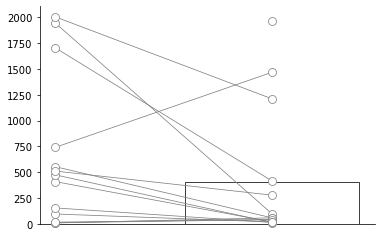

In [69]:
tp.barscatter([[NR_F_Malt_Licks, NR_F_Cas_Licks]], paired=True)

C:\Users\kvo019\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


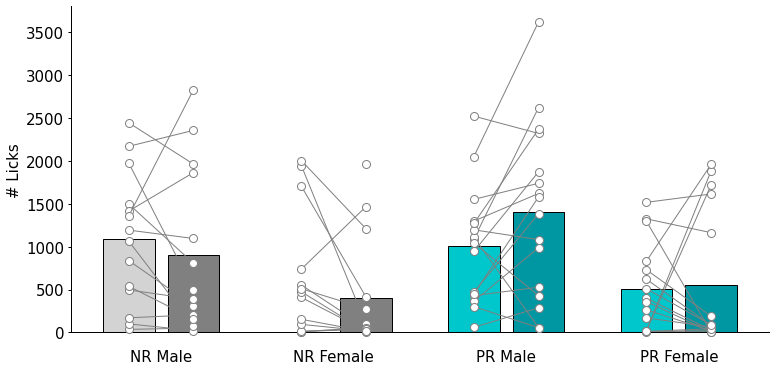

In [70]:
colors = ["lightgrey", "grey", "lightgrey", "grey", "#00C7CC", "#0097A3", "#00C7CC", "#0097A3"]

f,ax=plt.subplots(figsize=(12.5,6), ncols=1)
tp.barscatter([[NR_M_Malt_Licks, NR_M_Cas_Licks], [NR_F_Malt_Licks, NR_F_Cas_Licks], [PR_M_Malt_Licks, PR_M_Cas_Licks], [PR_F_Malt_Licks, PR_F_Cas_Licks]], 
              paired = True,
              unequal = True,
              grouplabel= ["NR Male", "NR Female", "PR Male", "PR Female"],
              xfontsize = 15,
              barfacecolor=colors,
              barfacecoloroption="individual",
              scattersize=80,
              linewidth=1,
              ax=ax)

ax.set_ylabel("# Licks", fontsize = 15)
y= [0, 500, 1000, 1500, 2000, 2500, 3000, 3500]
ax.tick_params(axis='y', labelsize=15)

f.savefig("C:\\Data\\ARP3_ARP5_Medbox.png")

In [71]:
NR

['ARP301',
 'ARP302',
 'ARP303',
 'ARP307',
 'ARP308',
 'ARP309',
 'ARP313',
 'ARP314',
 'ARP505',
 'ARP506',
 'ARP509',
 'ARP510',
 'ARP513',
 'ARP514',
 'ARP517',
 'ARP518',
 'ARP521',
 'ARP522',
 'ARP525',
 'ARP526',
 'ARP529',
 'ARP530',
 'ARP533',
 'ARP537',
 'ARP538',
 'ARP542',
 'ARP545',
 'ARP546']